# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [414]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [415]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for more exploration. Make sure to comment what you find!

In [416]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [417]:
# data types
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [418]:
# Your comment here
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [419]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [420]:
# Target
websites['Type'].value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

In [421]:
def cat_var(df, cols):
    '''
    Return: a Pandas dataframe object with the following columns:
        - "categorical_variable" => every categorical variable include as an input parameter (string).
        - "number_of_possible_values" => the amount of unique values that can take a given categorical variable (integer).
        - "values" => a list with the posible unique values for every categorical variable (list).

    Input parameters:
        - df -> Pandas dataframe object: a dataframe with categorical variables.
        - cols -> list object: a list with the name (string) of every categorical variable to analyse.
    '''
    cat_list = []
    for col in cols:
        cat = df[col].unique()
        cat_num = len(cat)
        cat_dict = {"categorical_variable":col,
                    "number_of_possible_values":cat_num,
                    "values":cat}
        cat_list.append(cat_dict)
    df = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values", ascending=False)
    return df.reset_index(drop=True)

In [422]:
col_websites = list(websites.columns)
cat_websites = cat_var(websites, col_websites)
cat_websites

,categorical_variable,number_of_possible_values,values
0,URL,1781,"[M0_109, B0_2314, B0_911, B0_113, B0_403, B0_2..."
1,WHOIS_REGDATE,891,"[10/10/2015 18:21, nan, 7/10/1997 4:00, 12/05/..."
2,SOURCE_APP_BYTES,885,"[1153, 1265, 0, 18784, 129889, 838, 8559, 213,..."
3,APP_BYTES,825,"[700, 1230, 0, 3812, 4278, 894, 1189, 1492, 39..."
4,REMOTE_APP_BYTES,822,"[832, 1230, 0, 4380, 4586, 894, 1327, 146, 178..."
5,CONTENT_LENGTH,638,"[263.0, 15087.0, 324.0, 162.0, 124140.0, nan, ..."
6,WHOIS_UPDATED_DATE,594,"[nan, 12/09/2013 0:45, 11/04/2017 0:00, 3/10/2..."
7,SERVER,239,"[nginx, Apache/2.4.10, Microsoft-HTTPAPI/2.0, ..."
8,WHOIS_STATEPRO,182,"[nan, AK, TX, Mahe, CO, FL, Kansas, Novosibirs..."
9,URL_LENGTH,142,"[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 2..."


#### Next, evaluate if the columns in this dataset are strongly correlated.

In class, we discussed that we are concerned if our dataset has strongly correlated columns because if this is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [423]:
websites_num = websites.select_dtypes(include=['number'])

In [424]:
websites_corr = round(websites_num.corr(),2)
websites_corr

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.00,0.92,0.13,-0.04,-0.04,-0.05,-0.03,-0.04,-0.03,-0.01,-0.03,-0.04,-0.07,0.16
NUMBER_SPECIAL_CHARACTERS,0.92,1.00,0.21,-0.04,-0.04,-0.05,-0.02,-0.04,-0.03,-0.01,-0.02,-0.04,-0.05,0.28
CONTENT_LENGTH,0.13,0.21,1.00,0.08,-0.00,0.00,0.05,0.07,0.09,0.10,0.05,0.07,-0.05,-0.09
TCP_CONVERSATION_EXCHANGE,-0.04,-0.04,0.08,1.00,0.56,0.33,0.46,1.00,0.99,0.87,0.46,1.00,0.35,-0.04
DIST_REMOTE_TCP_PORT,-0.04,-0.04,-0.00,0.56,1.00,0.21,0.78,0.56,0.59,0.31,0.78,0.56,0.26,-0.08
REMOTE_IPS,-0.05,-0.05,0.00,0.33,0.21,1.00,0.02,0.36,0.30,0.17,0.03,0.36,0.55,-0.08
APP_BYTES,-0.03,-0.02,0.05,0.46,0.78,0.02,1.00,0.45,0.47,0.07,1.00,0.45,0.01,-0.01
SOURCE_APP_PACKETS,-0.04,-0.04,0.07,1.00,0.56,0.36,0.45,1.00,0.99,0.86,0.45,1.00,0.41,-0.03
REMOTE_APP_PACKETS,-0.03,-0.03,0.09,0.99,0.59,0.30,0.47,0.99,1.00,0.88,0.47,0.99,0.36,-0.03
SOURCE_APP_BYTES,-0.01,-0.01,0.10,0.87,0.31,0.17,0.07,0.86,0.88,1.00,0.08,0.86,0.22,-0.04


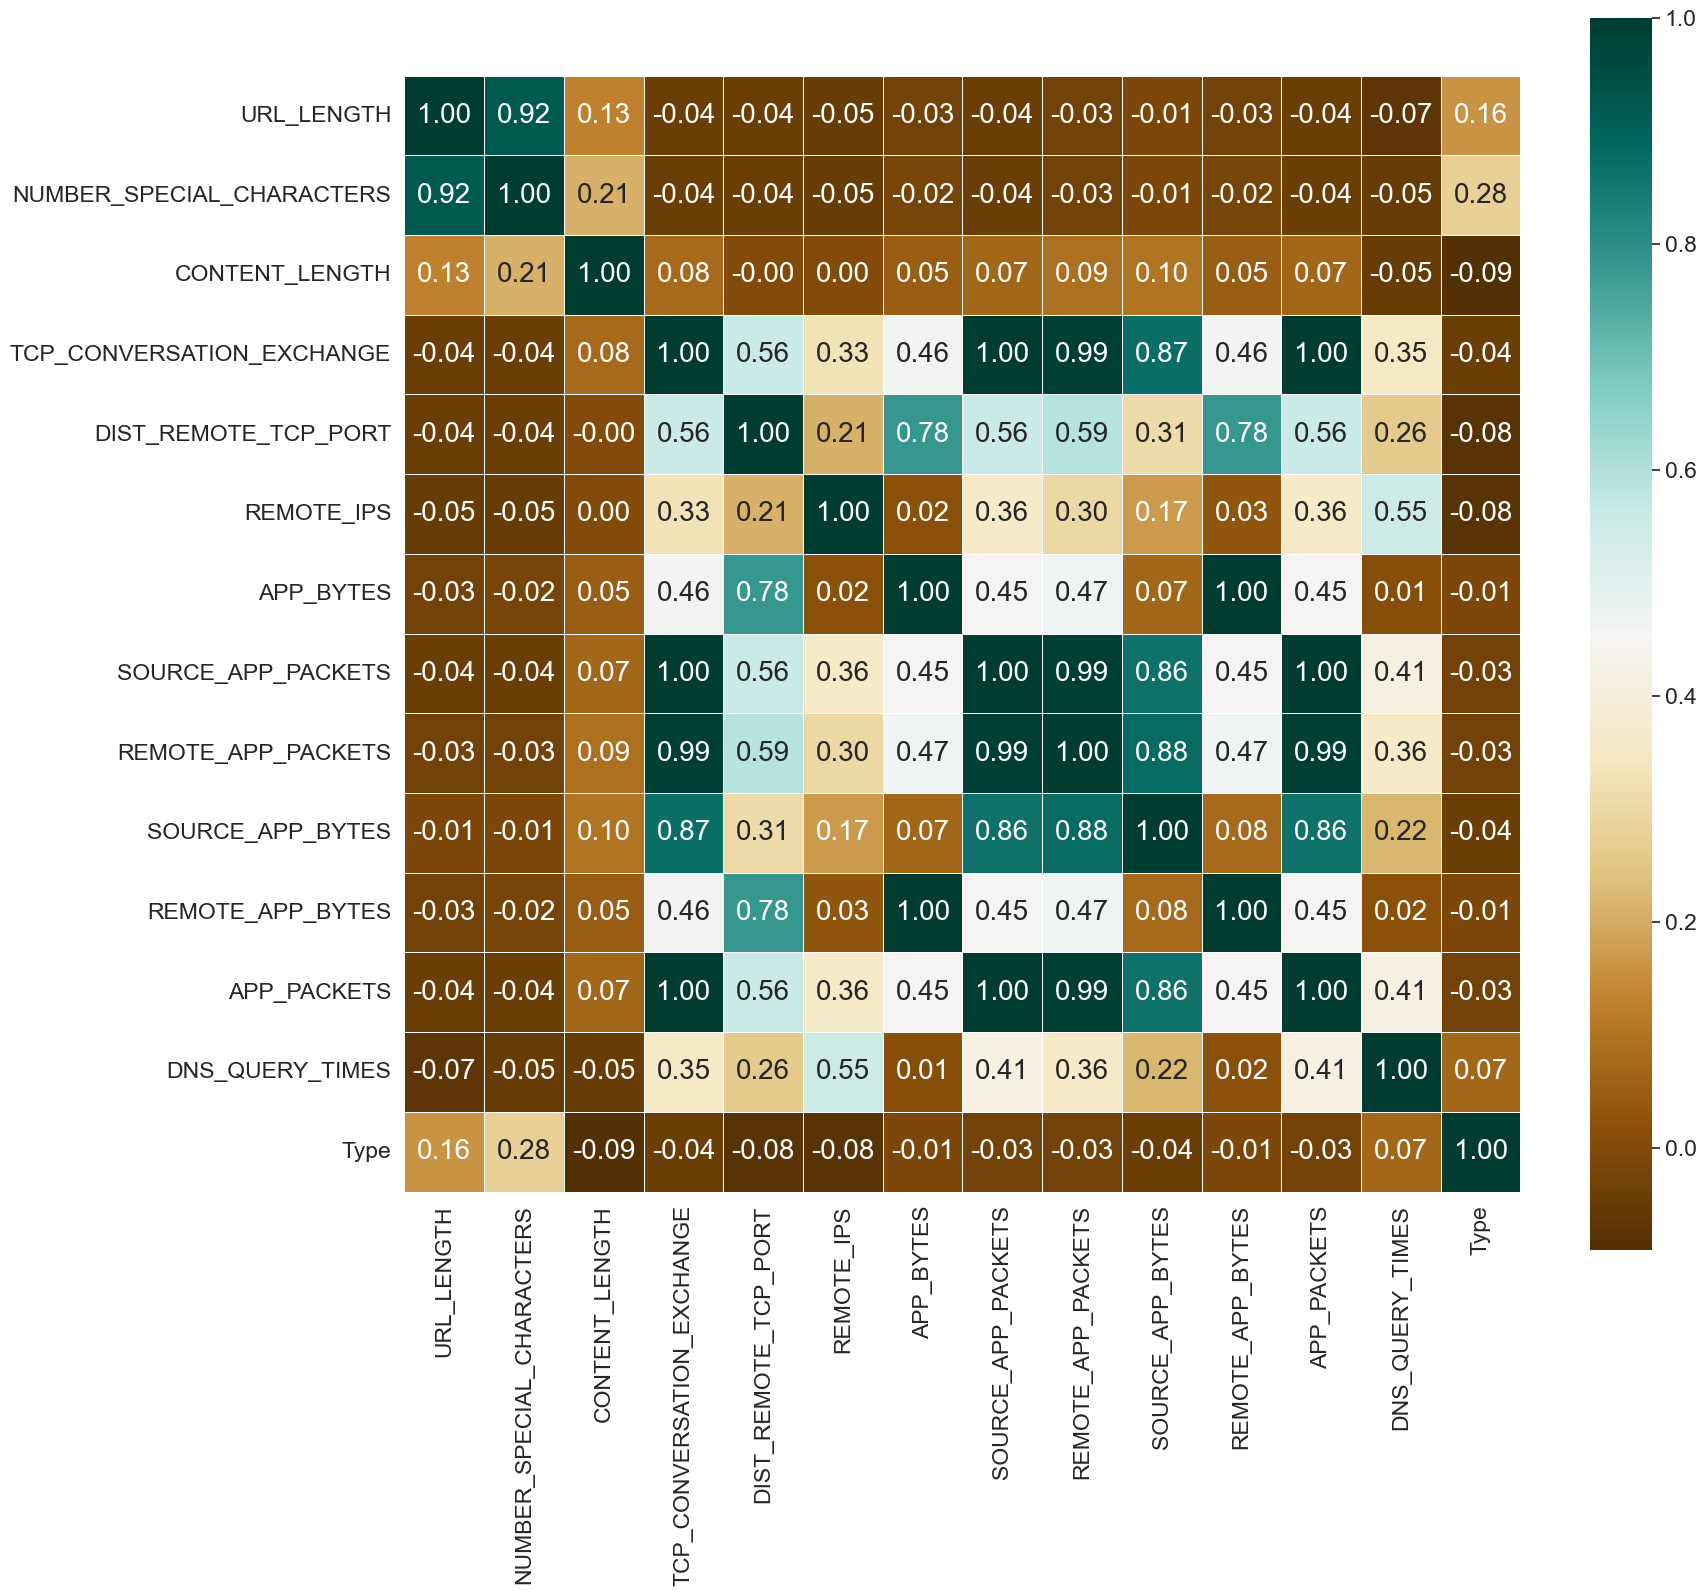

In [425]:
# Your code here
plt.figure(figsize=(18, 16))
sns.set(font_scale=1.5)
sns.heatmap(
    websites_corr, cmap='BrBG', annot=True, fmt='.2f',
    cbar=True,
    square=True,
    annot_kws={'size': 20},
    linewidth=.5,
)
# Muestra el gráfico
plt.show()

In [426]:
# Your comment here
# Type no está muy correlacionada con ninguna
# Number_Special_Characters y URL_Length muy correlada
# Remote_App_Packets con App_packets, Source_App_bytes y Top_conversation_Exchange

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [427]:
# Columnas numéricas
website_num_cols = list(websites_num.columns)
website_num_cols

['URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CONTENT_LENGTH',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'SOURCE_APP_PACKETS',
 'REMOTE_APP_PACKETS',
 'SOURCE_APP_BYTES',
 'REMOTE_APP_BYTES',
 'APP_PACKETS',
 'DNS_QUERY_TIMES',
 'Type']

In [428]:
# Eliminamos Source App Packets
websites_num = website_num[['URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CONTENT_LENGTH',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'REMOTE_APP_PACKETS',
 'SOURCE_APP_BYTES',
 'REMOTE_APP_BYTES',
 'APP_PACKETS',
 'DNS_QUERY_TIMES',
 'Type']]
websites_num

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,NaN,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,NaN,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,8904.0,83,2,6,6631,89,132181,6945,87,4.0,0
1779,234,34,NaN,0,0,0,0,0,0,0,0,0.0,0


In [429]:
# Sacamos la correlacion de nuevo
websites_corr = round(websites_num.corr(),2)
websites_corr

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.00,0.92,0.13,-0.04,-0.04,-0.05,-0.03,-0.03,-0.01,-0.03,-0.04,-0.07,0.16
NUMBER_SPECIAL_CHARACTERS,0.92,1.00,0.21,-0.04,-0.04,-0.05,-0.02,-0.03,-0.01,-0.02,-0.04,-0.05,0.28
CONTENT_LENGTH,0.13,0.21,1.00,0.08,-0.00,0.00,0.05,0.09,0.10,0.05,0.07,-0.05,-0.09
TCP_CONVERSATION_EXCHANGE,-0.04,-0.04,0.08,1.00,0.56,0.33,0.46,0.99,0.87,0.46,1.00,0.35,-0.04
DIST_REMOTE_TCP_PORT,-0.04,-0.04,-0.00,0.56,1.00,0.21,0.78,0.59,0.31,0.78,0.56,0.26,-0.08
REMOTE_IPS,-0.05,-0.05,0.00,0.33,0.21,1.00,0.02,0.30,0.17,0.03,0.36,0.55,-0.08
APP_BYTES,-0.03,-0.02,0.05,0.46,0.78,0.02,1.00,0.47,0.07,1.00,0.45,0.01,-0.01
REMOTE_APP_PACKETS,-0.03,-0.03,0.09,0.99,0.59,0.30,0.47,1.00,0.88,0.47,0.99,0.36,-0.03
SOURCE_APP_BYTES,-0.01,-0.01,0.10,0.87,0.31,0.17,0.07,0.88,1.00,0.08,0.86,0.22,-0.04
REMOTE_APP_BYTES,-0.03,-0.02,0.05,0.46,0.78,0.03,1.00,0.47,0.08,1.00,0.45,0.02,-0.01


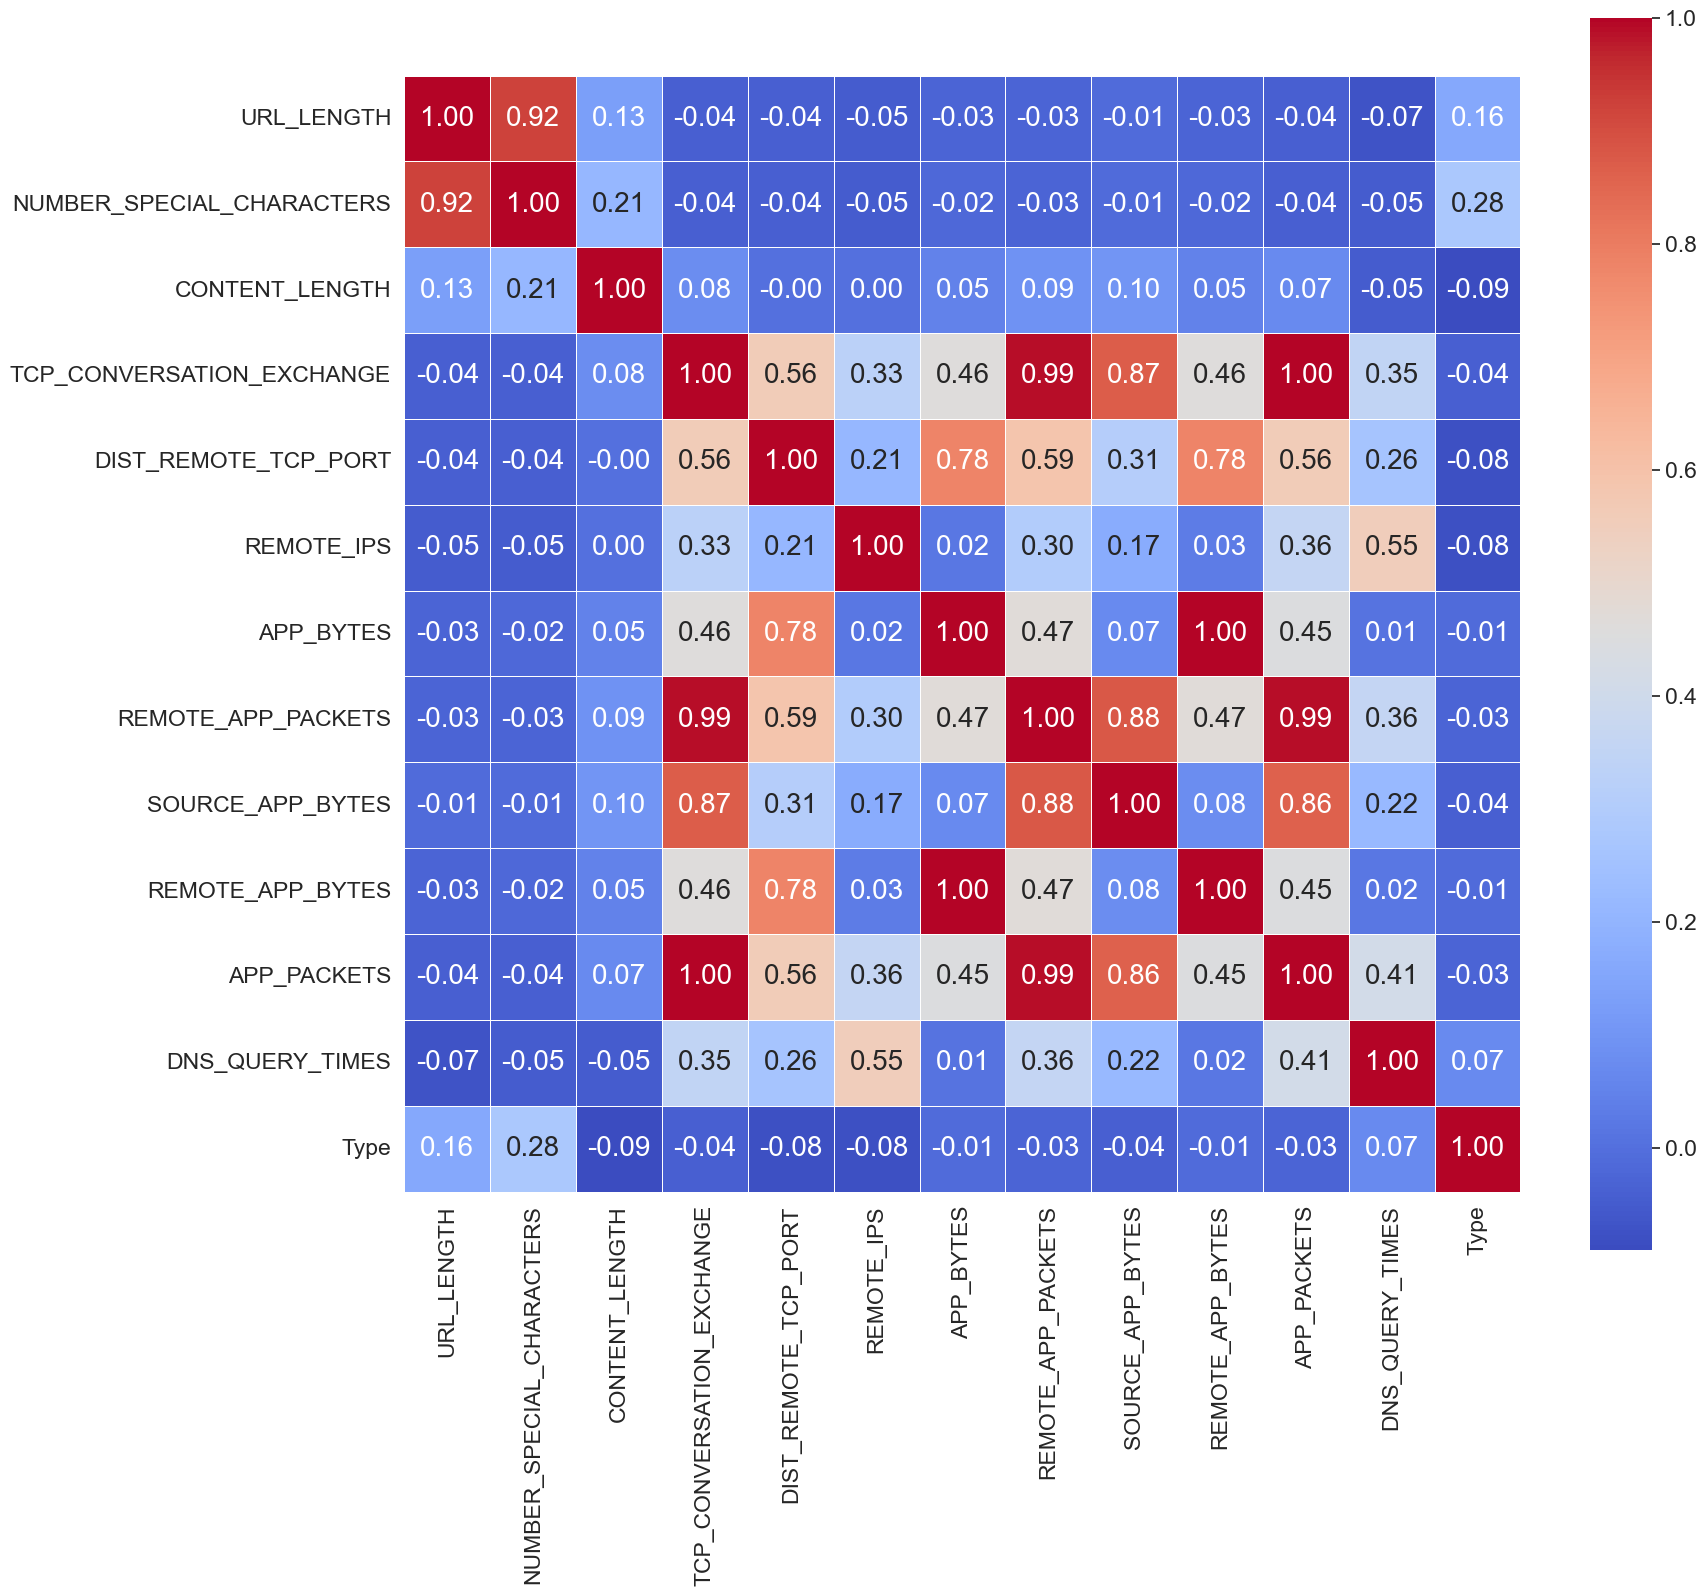

In [430]:
# Heatmap
plt.figure(figsize=(18, 16))
sns.set(font_scale=1.5)
sns.heatmap(
    websites_corr, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True,
    square=True,
    annot_kws={'size': 20},
    linewidth=.5,
)
# Muestra el gráfico
plt.show()

In [431]:
# Quitamos App_packets
websites_num = website_num[['URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CONTENT_LENGTH',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'REMOTE_APP_PACKETS',
 'SOURCE_APP_BYTES',
 'REMOTE_APP_BYTES',
 'DNS_QUERY_TIMES',
 'Type']]

In [432]:
websites_corr = round(websites_num.corr(),2)
websites_corr

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
URL_LENGTH,1.00,0.92,0.13,-0.04,-0.04,-0.05,-0.03,-0.03,-0.01,-0.03,-0.07,0.16
NUMBER_SPECIAL_CHARACTERS,0.92,1.00,0.21,-0.04,-0.04,-0.05,-0.02,-0.03,-0.01,-0.02,-0.05,0.28
CONTENT_LENGTH,0.13,0.21,1.00,0.08,-0.00,0.00,0.05,0.09,0.10,0.05,-0.05,-0.09
TCP_CONVERSATION_EXCHANGE,-0.04,-0.04,0.08,1.00,0.56,0.33,0.46,0.99,0.87,0.46,0.35,-0.04
DIST_REMOTE_TCP_PORT,-0.04,-0.04,-0.00,0.56,1.00,0.21,0.78,0.59,0.31,0.78,0.26,-0.08
REMOTE_IPS,-0.05,-0.05,0.00,0.33,0.21,1.00,0.02,0.30,0.17,0.03,0.55,-0.08
APP_BYTES,-0.03,-0.02,0.05,0.46,0.78,0.02,1.00,0.47,0.07,1.00,0.01,-0.01
REMOTE_APP_PACKETS,-0.03,-0.03,0.09,0.99,0.59,0.30,0.47,1.00,0.88,0.47,0.36,-0.03
SOURCE_APP_BYTES,-0.01,-0.01,0.10,0.87,0.31,0.17,0.07,0.88,1.00,0.08,0.22,-0.04
REMOTE_APP_BYTES,-0.03,-0.02,0.05,0.46,0.78,0.03,1.00,0.47,0.08,1.00,0.02,-0.01


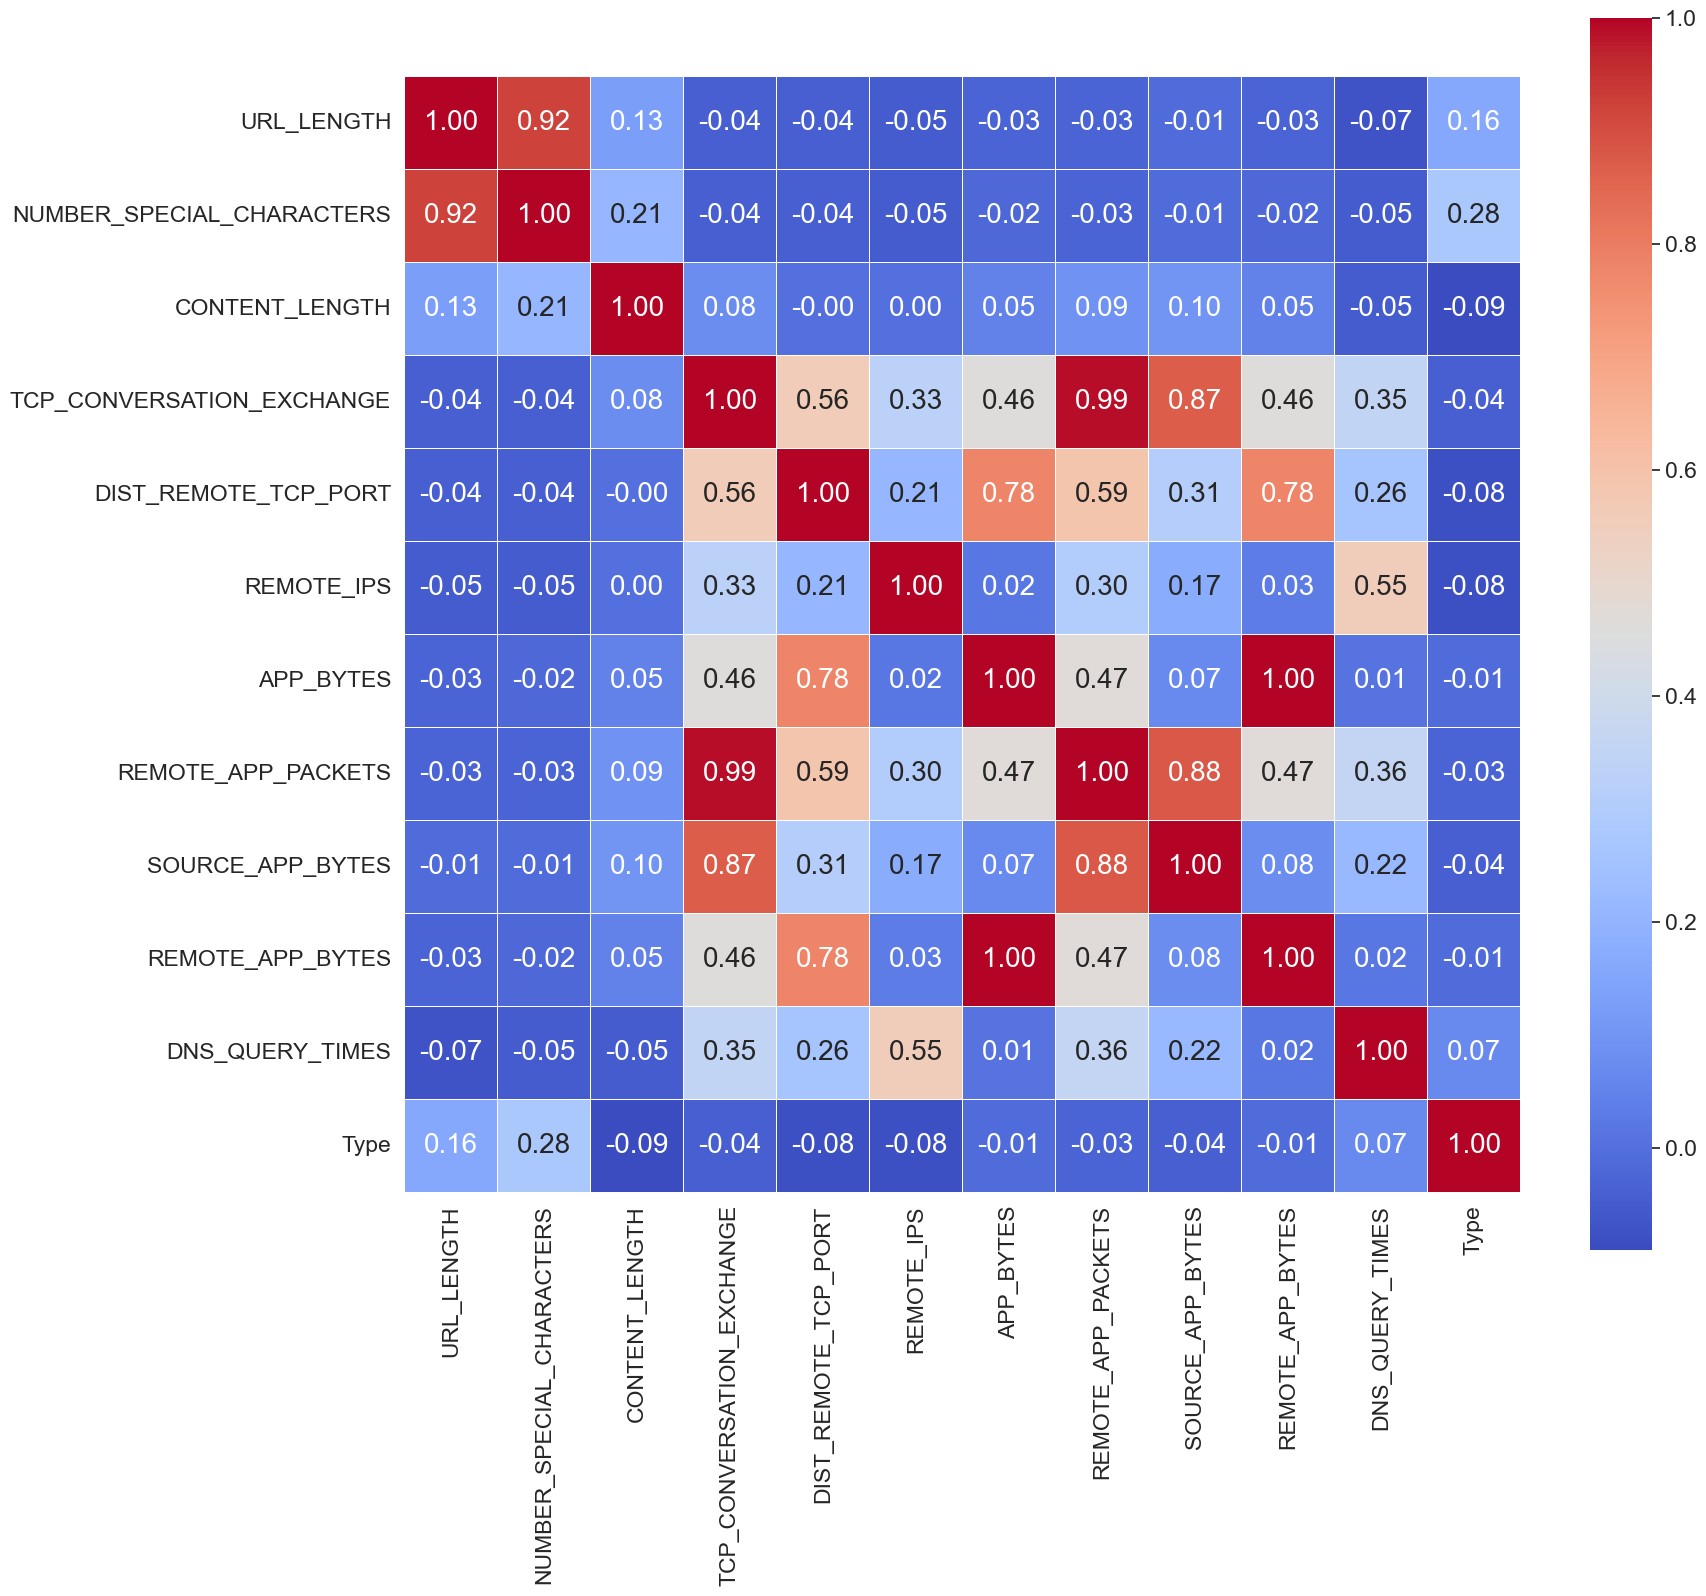

In [433]:
# Heatmap
plt.figure(figsize=(18, 16))
sns.set(font_scale=1.5)
sns.heatmap(
    websites_corr, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True,
    square=True,
    annot_kws={'size': 20},
    linewidth=.5,
)
# Muestra el gráfico
plt.show()

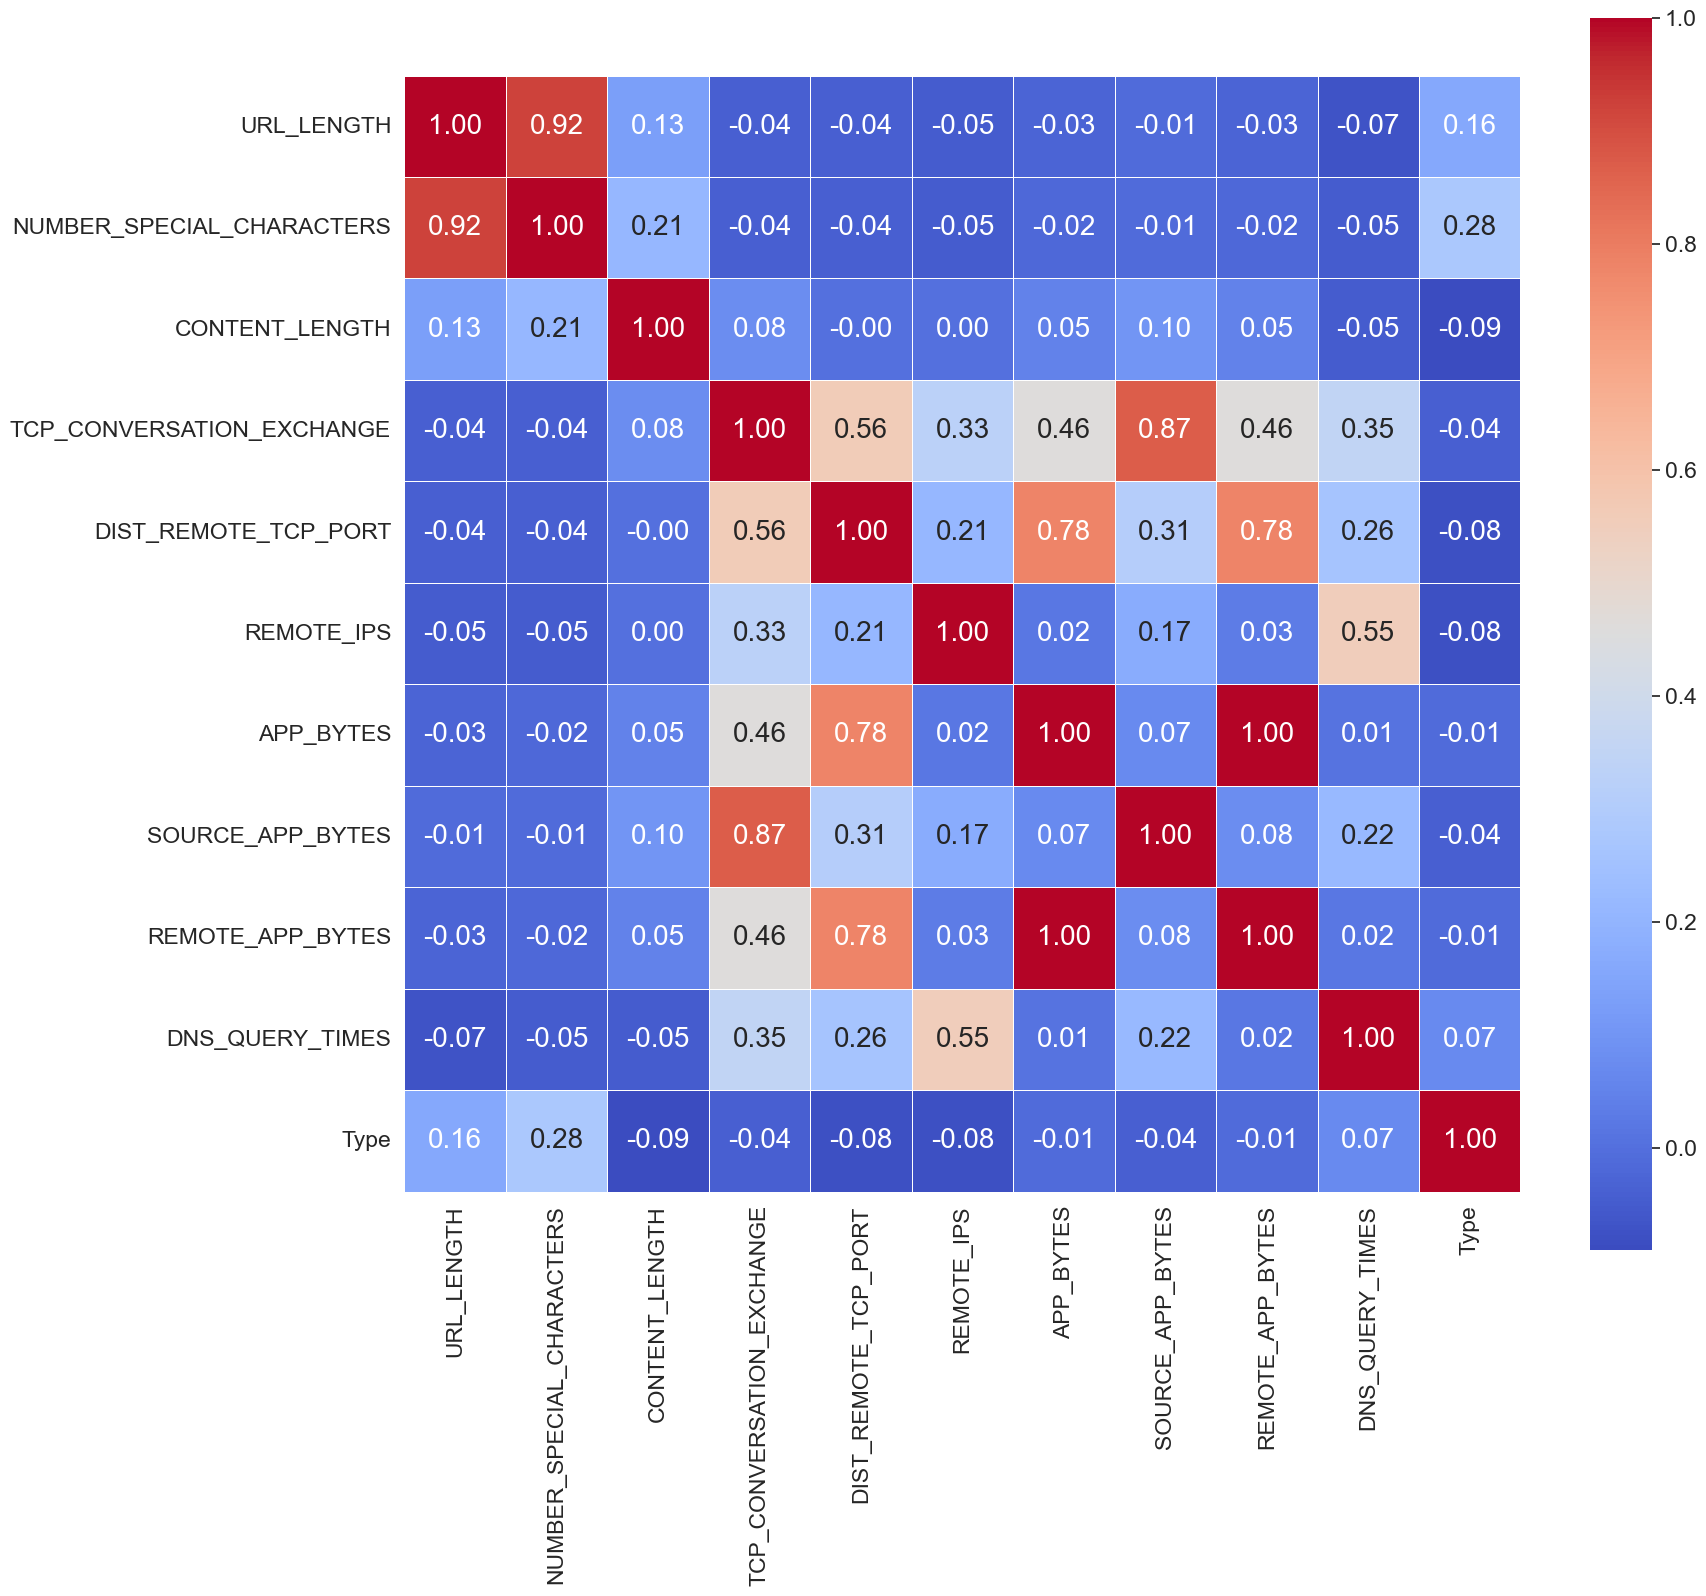

In [434]:
# Quitamos App_packets
websites_num = website_num[['URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CONTENT_LENGTH',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'SOURCE_APP_BYTES',
 'REMOTE_APP_BYTES',
 'DNS_QUERY_TIMES',
 'Type']]
websites_corr = round(websites_num.corr(),2)
# Heatmap
plt.figure(figsize=(18, 16))
sns.set(font_scale=1.5)
sns.heatmap(
    websites_corr, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True,
    square=True,
    annot_kws={'size': 20},
    linewidth=.5,
)
# Muestra el gráfico
plt.show()

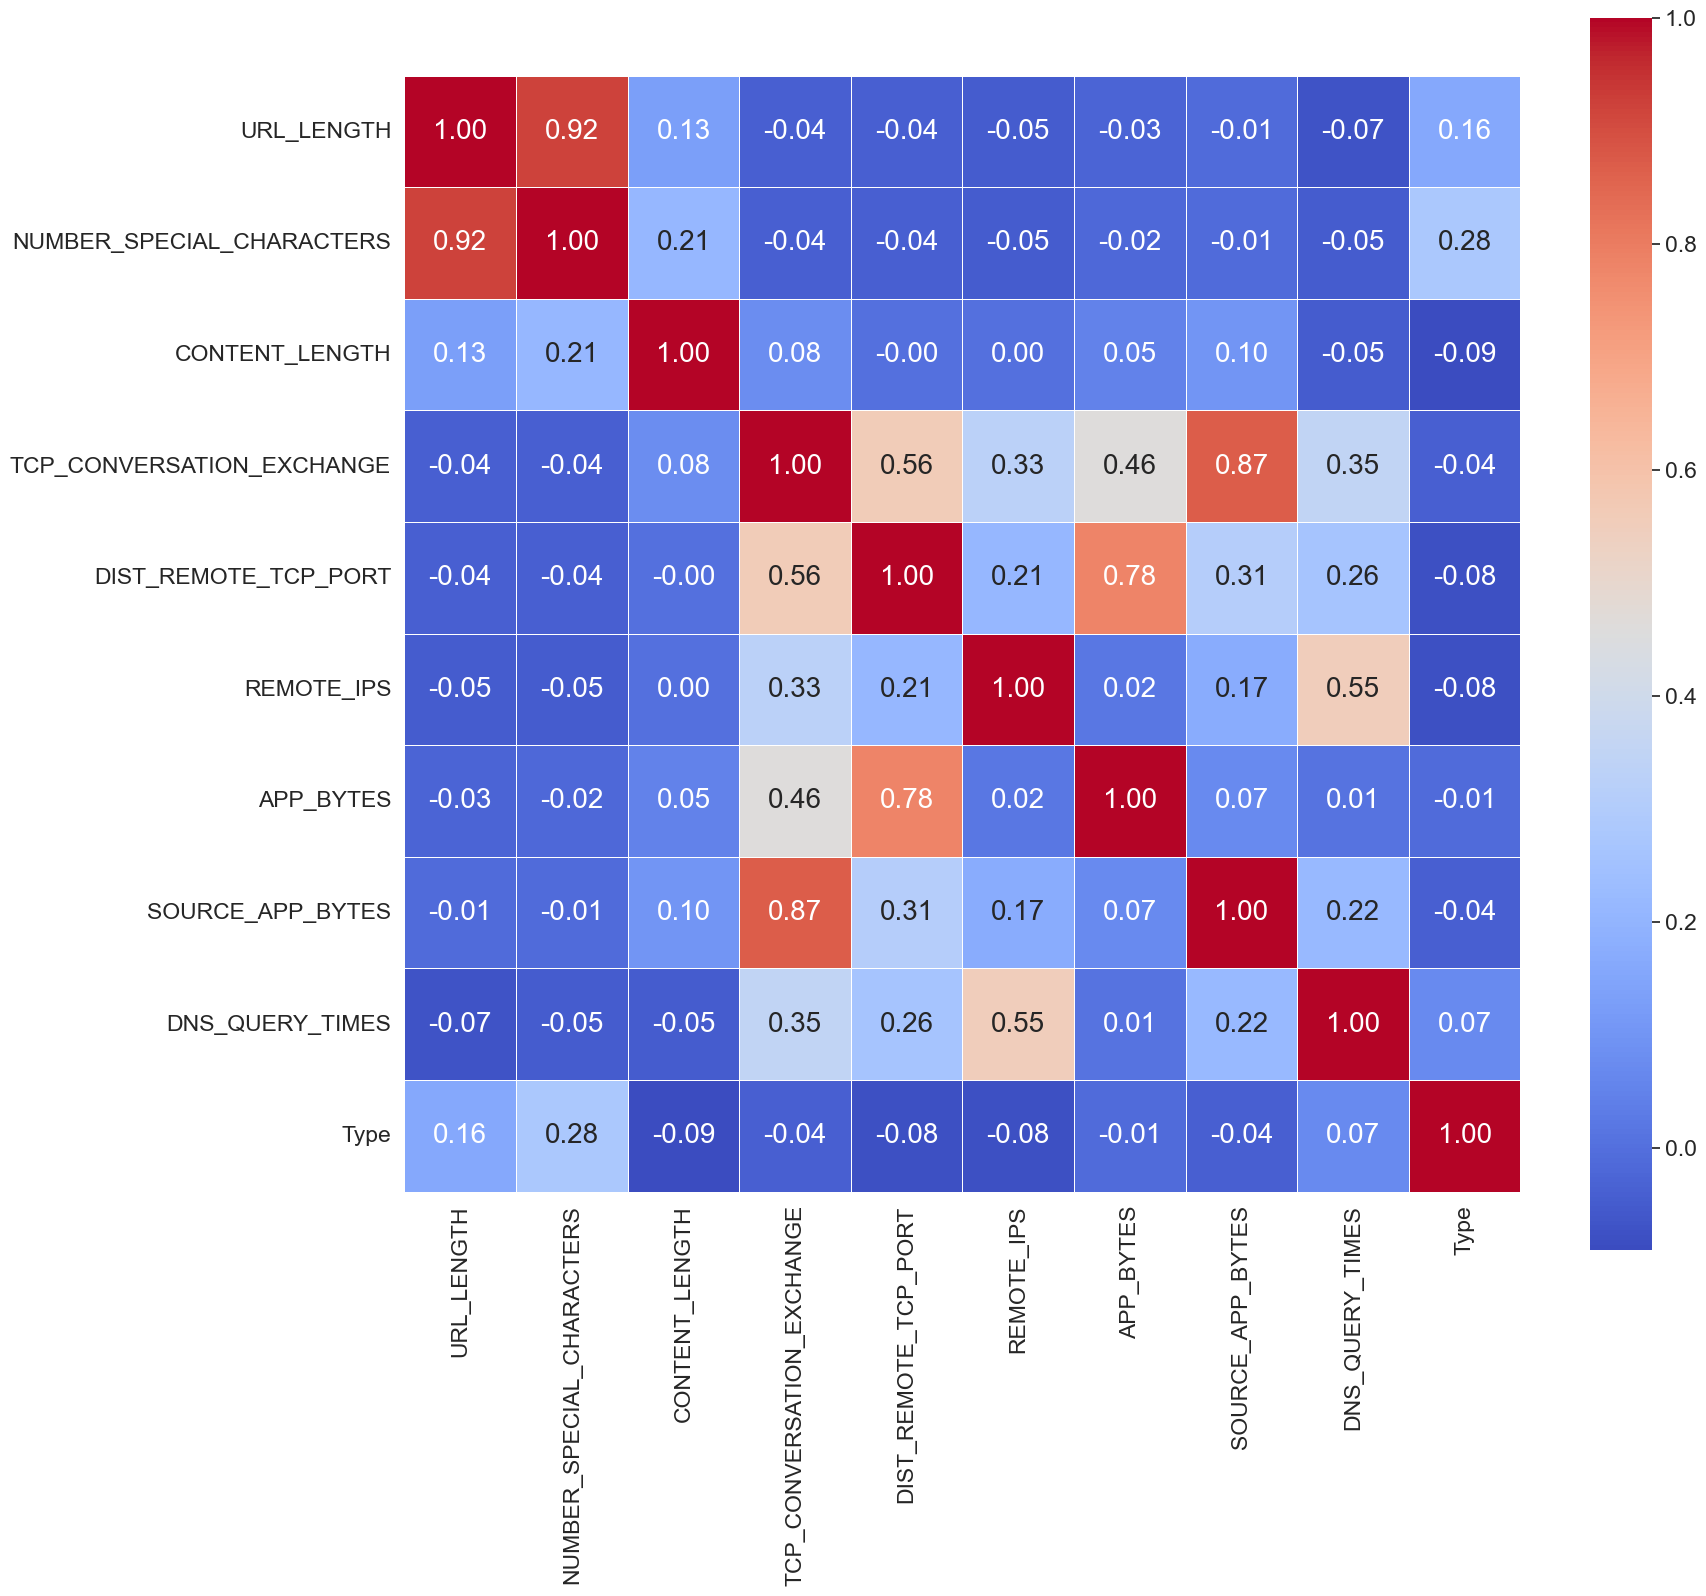

In [435]:
# Quitamos Remote_App_Bytes
websites_num = website_num[['URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CONTENT_LENGTH',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'SOURCE_APP_BYTES',
 'DNS_QUERY_TIMES',
 'Type']]
websites_corr = round(websites_num.corr(),2)
# Heatmap
plt.figure(figsize=(18, 16))
sns.set(font_scale=1.5)
sns.heatmap(
    websites_corr, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True,
    square=True,
    annot_kws={'size': 20},
    linewidth=.5,
)
# Muestra el gráfico
plt.show()

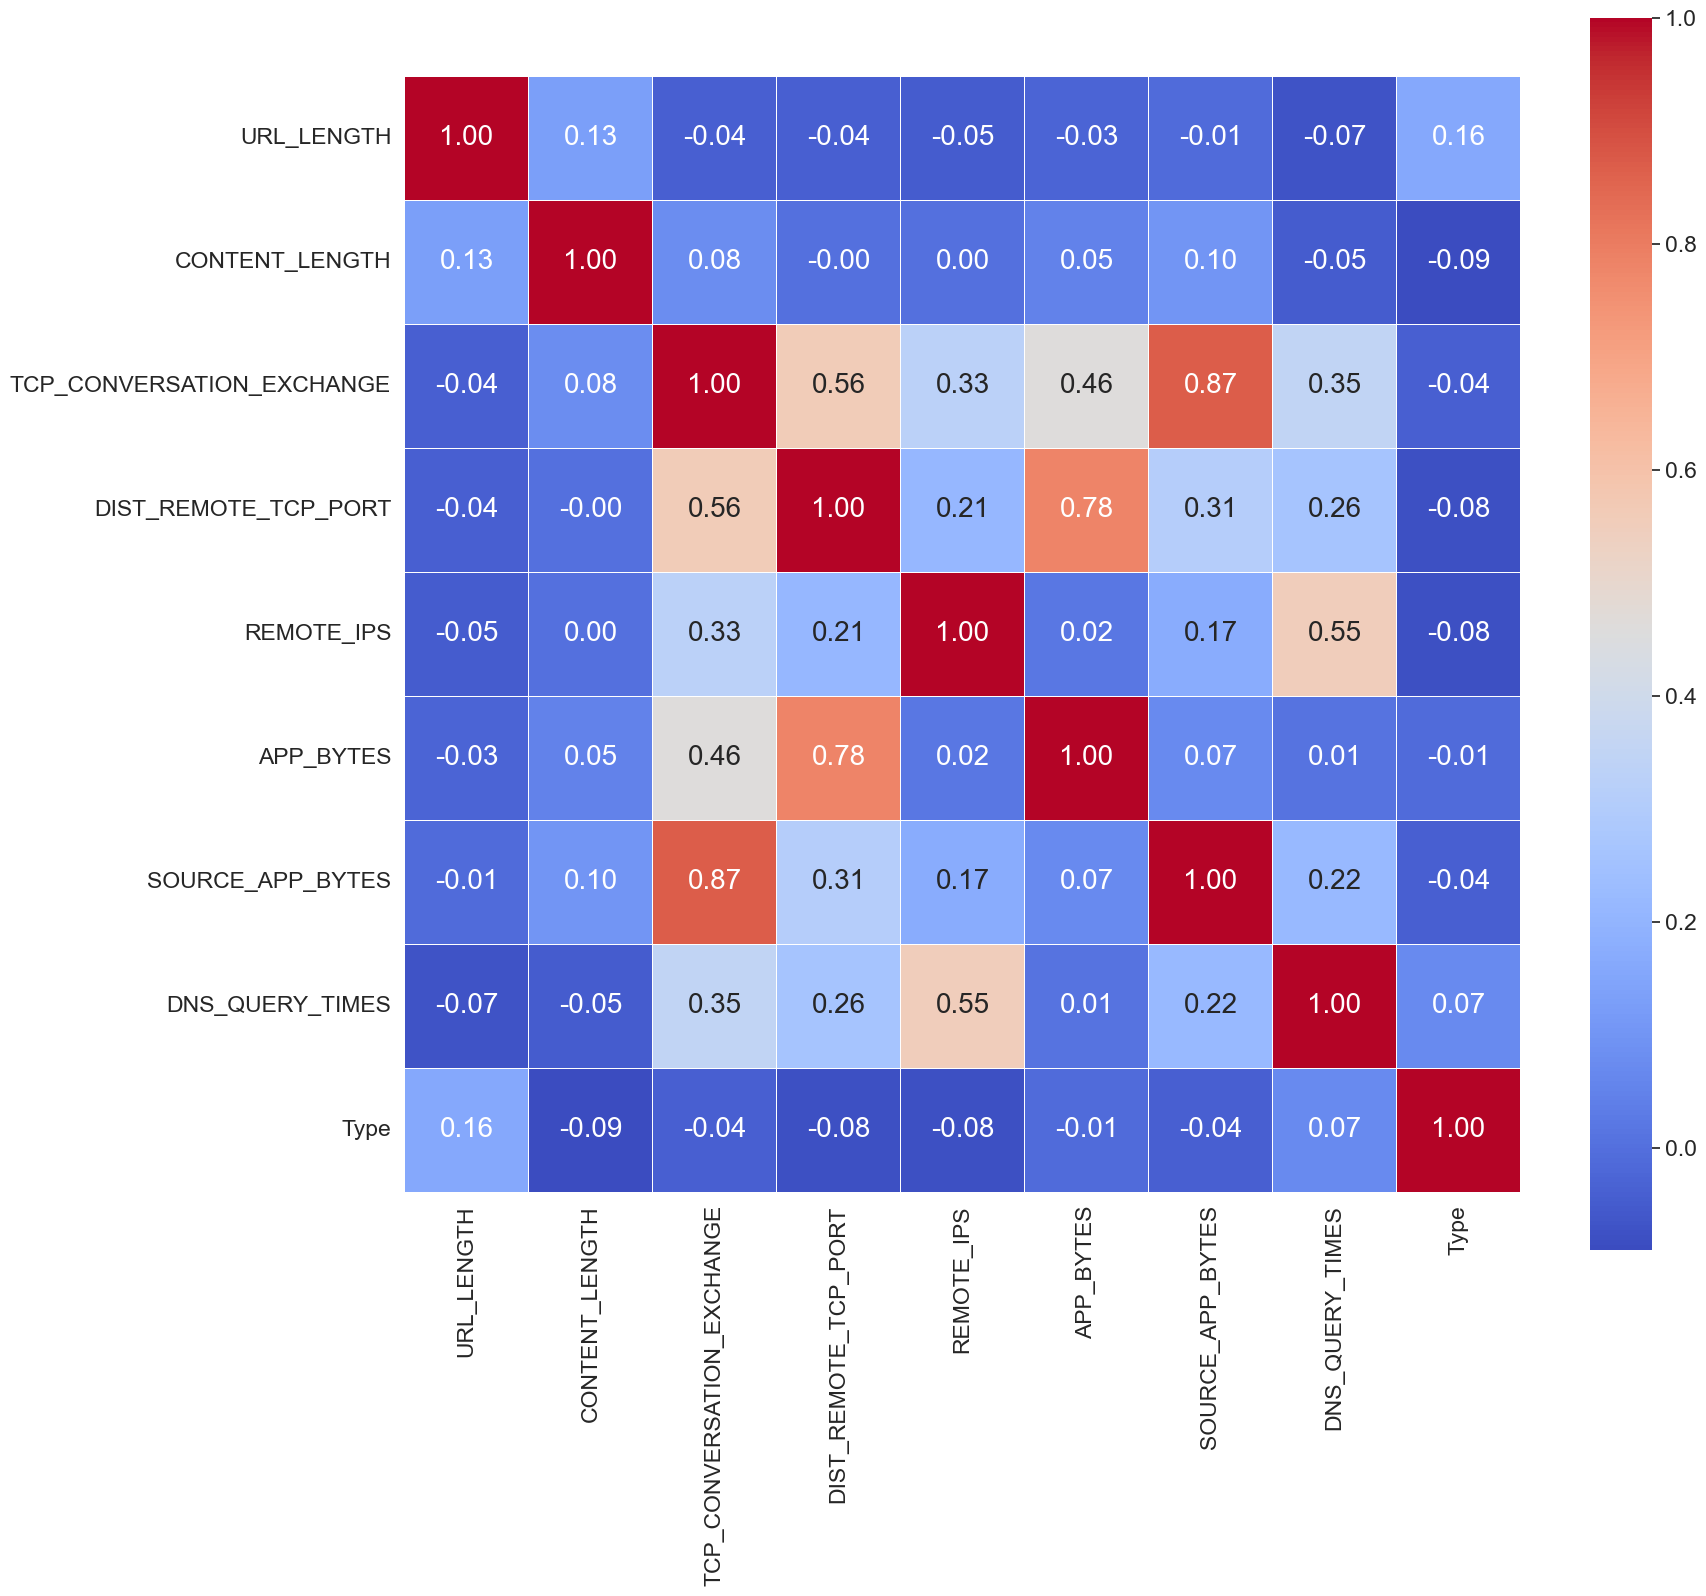

In [436]:
# Quitamos Remote_App_Bytes
websites_num = website_num[['URL_LENGTH',
 'CONTENT_LENGTH',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'SOURCE_APP_BYTES',
 'DNS_QUERY_TIMES',
 'Type']]
websites_corr = round(websites_num.corr(),2)
# Heatmap
plt.figure(figsize=(18, 16))
sns.set(font_scale=1.5)
sns.heatmap(
    websites_corr, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True,
    square=True,
    annot_kws={'size': 20},
    linewidth=.5,
)
# Muestra el gráfico
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [437]:
# Your code here
columnas_inicial = set(websites.select_dtypes(include=['number']).columns)
columnas_final = set(websites_num.columns)

In [438]:
columnas_diferentes = columnas_inicial - columnas_final
list(columnas_diferentes)

['NUMBER_SPECIAL_CHARACTERS',
 'SOURCE_APP_PACKETS',
 'APP_PACKETS',
 'REMOTE_APP_BYTES',
 'REMOTE_APP_PACKETS']

In [439]:
websites = websites.drop(['NUMBER_SPECIAL_CHARACTERS',
 'SOURCE_APP_PACKETS',
 'APP_PACKETS',
 'REMOTE_APP_BYTES',
 'REMOTE_APP_PACKETS'], axis=1)

In [440]:
websites.columns

Index(['URL', 'URL_LENGTH', 'CHARSET', 'SERVER', 'CONTENT_LENGTH',
       'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_BYTES',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [441]:
# Calcular el total de nulos y el porcentaje de nulos por columna
total_nulos_por_columna = websites.isnull().sum()
porcentaje_nulos_por_columna = (websites.isnull().mean() * 100).round(2)

# Crear un DataFrame con las columnas deseadas
resumen_nulos = pd.DataFrame({
    'Total_Nulos': total_nulos_por_columna,
    'Porcentaje_Nulos': porcentaje_nulos_por_columna
})
resumen_nulos

,Total_Nulos,Porcentaje_Nulos
URL,0,0.00
URL_LENGTH,0,0.00
CHARSET,7,0.39
SERVER,176,9.88
CONTENT_LENGTH,812,45.59
WHOIS_COUNTRY,306,17.18
WHOIS_STATEPRO,362,20.33
WHOIS_REGDATE,127,7.13
WHOIS_UPDATED_DATE,139,7.80
TCP_CONVERSATION_EXCHANGE,0,0.00


In [442]:
nul_websites = ['CHARSET','SERVER', 'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
                                 'WHOIS_REGDATE','WHOIS_UPDATED_DATE', 'DNS_QUERY_TIMES']
cat_websites = cat_var(websites, nul_websites)
cat_websites

,categorical_variable,number_of_possible_values,values
0,WHOIS_REGDATE,891,"[10/10/2015 18:21, nan, 7/10/1997 4:00, 12/05/..."
1,CONTENT_LENGTH,638,"[263.0, 15087.0, 324.0, 162.0, 124140.0, nan, ..."
2,WHOIS_UPDATED_DATE,594,"[nan, 12/09/2013 0:45, 11/04/2017 0:00, 3/10/2..."
3,SERVER,239,"[nginx, Apache/2.4.10, Microsoft-HTTPAPI/2.0, ..."
4,WHOIS_STATEPRO,182,"[nan, AK, TX, Mahe, CO, FL, Kansas, Novosibirs..."
5,WHOIS_COUNTRY,49,"[nan, US, SC, GB, UK, RU, AU, CA, PA, se, IN, ..."
6,DNS_QUERY_TIMES,11,"[2.0, 0.0, 8.0, 4.0, 10.0, 6.0, 12.0, 14.0, 20..."
7,CHARSET,9,"[iso-8859-1, UTF-8, us-ascii, ISO-8859-1, utf-..."


In [443]:
websites['DATE'] = websites['WHOIS_UPDATED_DATE'].combine_first(websites['WHOIS_REGDATE'])
websites[['WHOIS_REGDATE','WHOIS_UPDATED_DATE','DATE']]

,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DATE
0,10/10/2015 18:21,NaN,10/10/2015 18:21
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,7/10/1997 4:00,12/09/2013 0:45,12/09/2013 0:45
4,12/05/1996 0:00,11/04/2017 0:00,11/04/2017 0:00
...,...,...,...
1776,17/09/2008 0:00,2/09/2016 0:00,2/09/2016 0:00
1777,17/09/2008 0:00,2/09/2016 0:00,2/09/2016 0:00
1778,15/02/1999 0:00,15/07/2015 0:00,15/07/2015 0:00
1779,1/04/1998 0:00,9/12/2016 0:00,9/12/2016 0:00


In [444]:
websites['DATE'] = pd.to_datetime(websites['DATE'], format='%d/%m/%Y %H:%M' , errors='coerce')
websites[['WHOIS_REGDATE','WHOIS_UPDATED_DATE','DATE']]

,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DATE
0,10/10/2015 18:21,NaN,2015-10-10 18:21:00
1,NaN,NaN,NaT
2,NaN,NaN,NaT
3,7/10/1997 4:00,12/09/2013 0:45,2013-09-12 00:45:00
4,12/05/1996 0:00,11/04/2017 0:00,2017-04-11 00:00:00
...,...,...,...
1776,17/09/2008 0:00,2/09/2016 0:00,2016-09-02 00:00:00
1777,17/09/2008 0:00,2/09/2016 0:00,2016-09-02 00:00:00
1778,15/02/1999 0:00,15/07/2015 0:00,2015-07-15 00:00:00
1779,1/04/1998 0:00,9/12/2016 0:00,2016-12-09 00:00:00


In [445]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   URL                        1781 non-null   object        
 1   URL_LENGTH                 1781 non-null   int64         
 2   CHARSET                    1774 non-null   object        
 3   SERVER                     1605 non-null   object        
 4   CONTENT_LENGTH             969 non-null    float64       
 5   WHOIS_COUNTRY              1475 non-null   object        
 6   WHOIS_STATEPRO             1419 non-null   object        
 7   WHOIS_REGDATE              1654 non-null   object        
 8   WHOIS_UPDATED_DATE         1642 non-null   object        
 9   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64         
 10  DIST_REMOTE_TCP_PORT       1781 non-null   int64         
 11  REMOTE_IPS                 1781 non-null   int64         
 12  APP_BY

In [446]:
websites = websites.drop(['WHOIS_REGDATE','WHOIS_UPDATED_DATE'], axis=1)

In [447]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   URL                        1781 non-null   object        
 1   URL_LENGTH                 1781 non-null   int64         
 2   CHARSET                    1774 non-null   object        
 3   SERVER                     1605 non-null   object        
 4   CONTENT_LENGTH             969 non-null    float64       
 5   WHOIS_COUNTRY              1475 non-null   object        
 6   WHOIS_STATEPRO             1419 non-null   object        
 7   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64         
 8   DIST_REMOTE_TCP_PORT       1781 non-null   int64         
 9   REMOTE_IPS                 1781 non-null   int64         
 10  APP_BYTES                  1781 non-null   int64         
 11  SOURCE_APP_BYTES           1781 non-null   int64         
 12  DNS_QU

In [448]:
# Extraer el mes y el año en nuevas columnas
websites['MONTH'] = websites['DATE'].dt.month
websites['YEAR'] = websites['DATE'].dt.year
websites[['DATE','YEAR','MONTH']]

,DATE,YEAR,MONTH
0,2015-10-10 18:21:00,2015.0,10.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,2013-09-12 00:45:00,2013.0,9.0
4,2017-04-11 00:00:00,2017.0,4.0
...,...,...,...
1776,2016-09-02 00:00:00,2016.0,9.0
1777,2016-09-02 00:00:00,2016.0,9.0
1778,2015-07-15 00:00:00,2015.0,7.0
1779,2016-12-09 00:00:00,2016.0,12.0


In [449]:
websites = websites.drop(['DATE'], axis=1)

In [450]:
# Calcular el total de nulos y el porcentaje de nulos por columna
total_nulos_por_columna = websites.isnull().sum()
porcentaje_nulos_por_columna = (websites.isnull().mean() * 100).round(2)

# Crear un DataFrame con las columnas deseadas
resumen_nulos = pd.DataFrame({
    'Total_Nulos': total_nulos_por_columna,
    'Porcentaje_Nulos': porcentaje_nulos_por_columna
})
resumen_nulos

,Total_Nulos,Porcentaje_Nulos
URL,0,0.00
URL_LENGTH,0,0.00
CHARSET,7,0.39
SERVER,176,9.88
CONTENT_LENGTH,812,45.59
WHOIS_COUNTRY,306,17.18
WHOIS_STATEPRO,362,20.33
TCP_CONVERSATION_EXCHANGE,0,0.00
DIST_REMOTE_TCP_PORT,0,0.00
REMOTE_IPS,0,0.00


In [451]:
# La correlación con la variable target es de -0.09 y además tiene un 47% de nulos, así que la eliminamos.
websites = websites.drop(['CONTENT_LENGTH'], axis=1)

In [452]:
websites[websites['CHARSET'].isna()]

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,MONTH,YEAR
35,B0_23,23,NaN,NaN,US,TX,19,7,6,2404,6179,4.0,0,7.0,2016.0
81,B0_179,26,NaN,tsa_c,US,CA,43,39,3,6325,32025,10.0,0,11.0,2016.0
125,B0_1051,29,NaN,tsa_c,US,CA,0,0,0,0,0,0.0,0,11.0,2016.0
159,B0_2206,30,NaN,Apache/2.4.18 (Unix) OpenSSL/1.0.2e Communique...,US,WI,6,4,4,552,564,0.0,0,10.0,2016.0
952,M0_58,52,NaN,Apache/2.4.6 (CentOS),CN,Bei Jing,14,1,8,1151,1211,4.0,1,9.0,2016.0
977,B0_670,52,NaN,Microsoft-IIS/8.5,US,NJ,19,0,4,1538,1121,4.0,0,11.0,2016.0
1069,B0_1144,56,NaN,Microsoft-IIS/7.0,US,New York,0,0,0,0,0,0.0,0,10.0,2016.0


In [453]:
websites['CHARSET'].value_counts()

CHARSET
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

In [454]:
def transformer_charset(valor):
    if valor == 'utf-8':
        return 'UTF-8'
    elif valor == 'iso-8859-1' or valor == 'ISO-8859':
        return 'ISO-8859-1'
    elif valor == 'windows-1251' or valor == 'windows-1252':
        return 'windows'
    else:
        return valor
    
websites['CHARSET'] = websites['CHARSET'].apply(transformer_charset)
websites['CHARSET'].value_counts()

CHARSET
UTF-8         1055
ISO-8859-1     562
us-ascii       155
windows          2
Name: count, dtype: int64

In [455]:
# Se rellenan los nulos con la moda: UTF-8
websites['CHARSET'].fillna('UTF-8', inplace=True)

In [457]:
websites['SERVER'].value_counts().head(50)

SERVER
Apache                                                                                       386
nginx                                                                                        211
Microsoft-HTTPAPI/2.0                                                                        113
cloudflare-nginx                                                                              94
Microsoft-IIS/7.5                                                                             51
GSE                                                                                           49
Server                                                                                        49
YouTubeFrontEnd                                                                               42
nginx/1.12.0                                                                                  36
ATS                                                                                           30
Apache/2.2.15 (CentOS) 

In [ ]:
import pandas as pd

# Supongamos que 'df' es tu DataFrame
data = {
    'Servidor': ['Microsoft IIS', 'ngix Web Server', 'Apache Tomcat', 'Other Server']
}

df = pd.DataFrame(data)

# Definir la función de asignación
def asignar_palabra(valor):
    palabras_a_buscar = ['Microsoft', 'ngix', 'Apache']
    for palabra in palabras_a_buscar:
        if palabra.lower() in valor.lower():
            return palabra
    return valor

# Aplicar la función a la columna 'Servidor' usando apply
df['Servidor'] = df['Servidor'].apply(asignar_palabra)

# Mostrar el DataFrame resultante
print("DataFrame con valores modificados:")
print(df)


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [403]:
# Your code here


In [404]:
# Your comment here

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [13]:
# Examine missing values in each column


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [14]:
# Your code here


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [15]:
# Your code here


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [16]:
# Your code here


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [17]:
# Your code here


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [18]:
# Your code here


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [19]:
# Your code here


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [20]:
# Your code here

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [21]:
# Your code here


![Think Hard](../images/think-hard.jpg)

In [24]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [25]:
# Your code here


In [26]:
# Count `SERVER` value counts here


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [27]:
# Your code here


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [28]:
# Your code here


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [29]:
from sklearn.model_selection import train_test_split

# Your code here:


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [30]:
# Your code here:



Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [31]:
# Your code here:



finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [32]:
# Your code here:



What are your thoughts on the performance of the model? Write your conclusions below.

In [33]:
# Your conclusions here:



#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [34]:
# Your code here:



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [35]:
# Your code here:



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [36]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [37]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [38]:
# Your code here